IMPORTING NECESSARY LIBRARIES

In [82]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import folium


LOADING DATASETS

In [53]:
temperature_df=pd.read_csv(r"D:\DL Projects\tranzmeo_task\temperature.csv")
binsize_df=pd.read_csv(r"D:\DL Projects\tranzmeo_task\BinSize.csv")
temperature_df

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106
...,...,...,...,...
165080,USC00205822,2015-06-09,TMAX,256
165081,USC00205822,2009-10-06,TMAX,167
165082,USC00205050,2014-07-14,TMAX,283
165083,USC00200230,2006-11-29,TMIN,117


CHECKING FOR DUPLICATE VALUES

In [38]:
df.isna().sum()

ID            0
Date          0
Element       0
Data_Value    0
dtype: int64

In [39]:
df.dtypes

ID            object
Date          object
Element       object
Data_Value     int64
dtype: object

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165085 entries, 0 to 165084
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   ID          165085 non-null  object
 1   Date        165085 non-null  object
 2   Element     165085 non-null  object
 3   Data_Value  165085 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 5.0+ MB


CONVERT DATE IN TEMPERATURE TO DATETIME FORMAT

In [54]:
temperature_df["Date"]=pd.to_datetime(temperature_df["Date"])

In [42]:
df.dtypes

ID                    object
Date          datetime64[ns]
Element               object
Data_Value             int64
dtype: object

EXTRACT RELEVANT FEATURES

In [ ]:
df["Year"] = df["Date"].dt.year
df["Month-Day"] = df["Date"].dt.strftime("%m-%d")


REMOVE LEAP DAYS

In [ ]:
df = df[df["Month-Day"]!="02-29"]


FILTER DATA FOR THE PERIODS 2005-2014

In [91]:
temperature_df_filtered = temperature_df[(temperature_df['Date'].dt.year >= 2005) & (temperature_df['Date'].dt.year <= 2014)]
temperature_df_filtered.loc[:, 'day_of_year'] = temperature_df_filtered['Date'].dt.dayofyear

C:\Users\Hp\AppData\Local\Temp\ipykernel_11552\384943984.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temperature_df_filtered.loc[:, 'day_of_year'] = temperature_df_filtered['Date'].dt.dayofyear


RECORD HIGH AND LOW TEMPERATURES

In [92]:
record_highs = temperature_df_filtered[temperature_df_filtered['Element'] == 'TMAX'].groupby('day_of_year')['Data_Value'].max()
record_lows = temperature_df_filtered[temperature_df_filtered['Element'] == 'TMIN'].groupby('day_of_year')['Data_Value'].min()

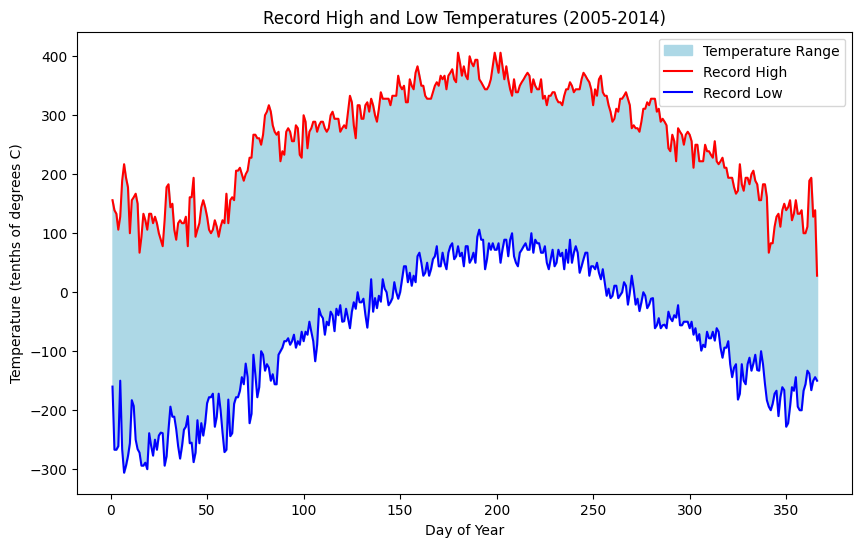

In [94]:
plt.figure(figsize=(10, 6))
plt.fill_between(record_highs.index, record_highs, record_lows, color='lightblue', label='Temperature Range')
plt.plot(record_highs.index, record_highs, color='red', label='Record High')
plt.plot(record_lows.index, record_lows, color='blue', label='Record Low')
plt.xlabel('Day of Year')
plt.ylabel('Temperature (tenths of degrees C)')
plt.title('Record High and Low Temperatures (2005-2014)')
plt.legend()
plt.show()

In [95]:
temperature_2015_df = temperature_df[temperature_df['Date'].dt.year == 2015].copy()
temperature_2015_df['day_of_year'] = temperature_2015_df['Date'].dt.dayofyear
broken_highs = temperature_2015_df.loc[(temperature_2015_df['Element'] == 'TMAX') & (temperature_2015_df['Data_Value'] > record_highs.loc[temperature_2015_df['day_of_year']].values), :]
broken_lows = temperature_2015_df.loc[(temperature_2015_df['Element'] == 'TMIN') & (temperature_2015_df['Data_Value'] < record_lows.loc[temperature_2015_df['day_of_year']].values), :]


SCATTER PLOT FOR BROKEN RECORDS 2015

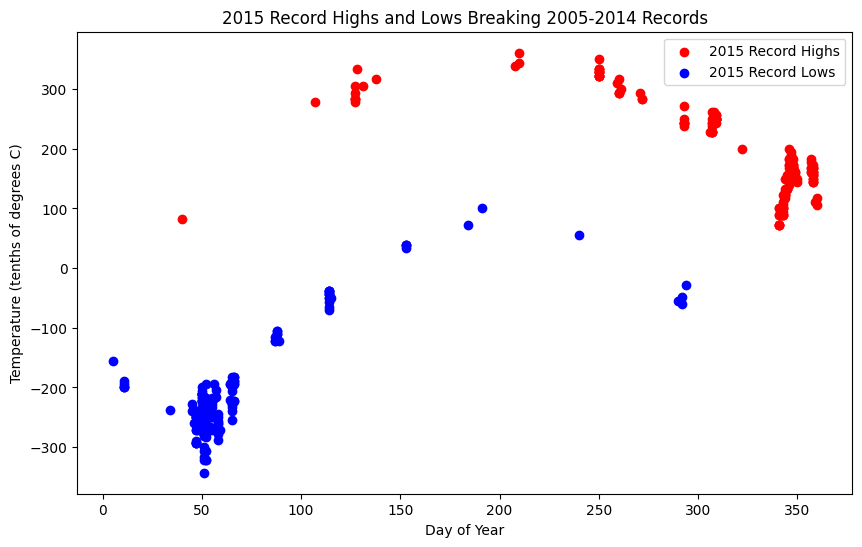

In [96]:
plt.figure(figsize=(10, 6))
plt.scatter(broken_highs['day_of_year'], broken_highs['Data_Value'], color='red', label='2015 Record Highs')
plt.scatter(broken_lows['day_of_year'], broken_lows['Data_Value'], color='blue', label='2015 Record Lows')
plt.xlabel('Day of Year')
plt.ylabel('Temperature (tenths of degrees C)')
plt.title('2015 Record Highs and Lows Breaking 2005-2014 Records')
plt.legend()
plt.show()

REMOVING LEAP DAYS

In [98]:
temperature_df_filtered = temperature_df_filtered[~((temperature_df_filtered['Date'].dt.month == 2) & (temperature_df_filtered['Date'].dt.day == 29))]
temperature_df_filtered

,ID,Date,Element,Data_Value,day_of_year
0,USW00094889,2014-11-12,TMAX,22,316
1,USC00208972,2009-04-29,TMIN,56,119
2,USC00200032,2008-05-26,TMAX,278,147
3,USC00205563,2005-11-11,TMAX,139,315
4,USC00200230,2014-02-27,TMAX,-106,58
...,...,...,...,...,...
165079,USC00202308,2005-03-02,TMIN,-67,61
165081,USC00205822,2009-10-06,TMAX,167,279
165082,USC00205050,2014-07-14,TMAX,283,195
165083,USC00200230,2006-11-29,TMIN,117,333


STATIONS NEAR ANN ARBOR, MICHIGAN, UNITED STATE

In [99]:
ann_arbor_lat = 42.2808
ann_arbor_lon = -83.743

FILTERSTATIONS NEAR ANN ARBOR ,MICHIGAN

In [100]:
stations_near_ann_arbor = binsize_df[(binsize_df['LATITUDE'].between(42.0, 42.6)) &
                                     (binsize_df['LONGITUDE'].between(-84.0, -83.0))]

In [101]:
map_ann_arbor = folium.Map(location=[ann_arbor_lat, ann_arbor_lon], zoom_start=10)

PLOTTING

In [102]:
for _, row in stations_near_ann_arbor.iterrows():
    folium.Marker([row['LATITUDE'], row['LONGITUDE']], popup=row['NAME']).add_to(map_ann_arbor)
map_ann_arbor.save("stations_near_ann_arbor.html")
map_ann_arbor


PLOT SUMMARY 2015

MAX MIN SUMMARY

In [103]:
daily_max_2015 = temperature_2015_df[temperature_2015_df['Element'] == 'TMAX'].groupby('Date')['Data_Value'].max()
daily_min_2015 = temperature_2015_df[temperature_2015_df['Element'] == 'TMIN'].groupby('Date')['Data_Value'].min()

DAILY TEMPEARTURE SUMMARY

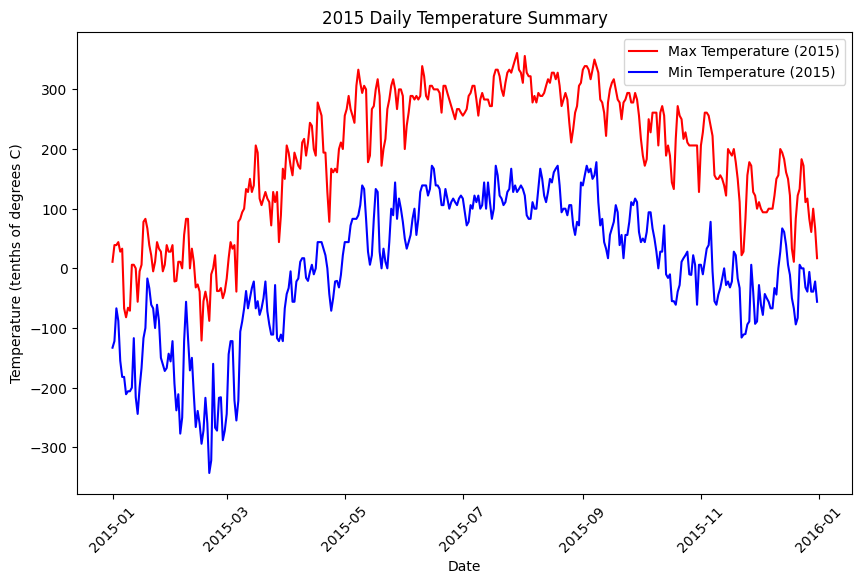

In [104]:
plt.figure(figsize=(10, 6))
plt.plot(daily_max_2015.index, daily_max_2015, label='Max Temperature (2015)', color='red')
plt.plot(daily_min_2015.index, daily_min_2015, label='Min Temperature (2015)', color='blue')
plt.xlabel('Date')
plt.ylabel('Temperature (tenths of degrees C)')
plt.title('2015 Daily Temperature Summary')
plt.legend()
plt.xticks(rotation=45)
plt.show()